# Convolution Neural Network: CIFAR-10 Dataset

This notebook uses the classic [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which is a labeled subset of the 80 million tiny images dataset. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

## Team: Buyang Li, Yuxuan Li

In [2]:
pip install tensorflow==2.3

Looking in indexes: http://pypi.douban.com/simple
     |████████████████████████████████| 165.2 MB 663 kB/s eta 0:00:011     |██████████▊                     | 55.6 MB 158.6 MB/s eta 0:00:01     |███████████▊                    | 60.8 MB 1.3 MB/s eta 0:01:19��████████        | 124.1 MB 855 kB/s eta 0:00:48
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


## The CIFAR-10 dataset

### Get the data
CIFAR-10 dataset is provided by Keras directly. The following codes show how to load it. 

In [2]:
# the data, shuffled and split between train and test sets 
from tensorflow.keras.datasets import cifar10
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = cifar10.load_data()

### Visualize data

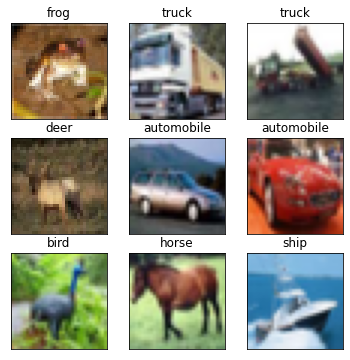

In [3]:
label_lst = ["airplane", "automobile", "bird", "cat", "deer",
            "dog", "frog", "horse", "ship", "truck"]
fig = plt.figure(figsize=(6, 6))
col = 3
row = 3
for i in range(col*row):
    label = label_lst[y_train_pre[i][0]]
    img = X_train_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('{}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

### convert class vectors to binary class matrices
convert class label to one-hot coding

In [4]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 9 samples are 6, 9,9,4,1,1,2,7,8
y_train[:9,] 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

### Normalize the features

In [5]:
img_rows, img_cols = 32, 32
X_train = X_train_pre.astype('float32') 
X_test = X_test_pre.astype('float32')
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_test,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#X_train /= 255. 
#X_test /= 255.

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])
train_idx = int(X_train.shape[0]*validation_split)
X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (40000, 32, 32, 3)
40000 train samples, 10000 validation samples, 10000 test samples


## The model

In [8]:
# dnn model fit
def define_model_dnn():
    model_dnn = Sequential()
    model_dnn.add(Flatten())
    model_dnn.add(Dense(512, activation='relu'))
    model_dnn.add(Dense(128, activation='relu')) 
    model_dnn.add(Dense(10, activation='softmax'))
    model_dnn.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(0.001), metrics=['accuracy'])
    return model_dnn

In [9]:
## generate model
model_dnn = define_model_dnn()
## model fit
model_dnn.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))
## model performance
performance = model_dnn.evaluate(X_test, y_test)
print( 'Dnn Test accuracy:' , performance[1])

Epoch 1/20
313/313 [==============================] - 7s 21ms/step - loss: 1.9450 - accuracy: 0.3481 - val_loss: 1.7687 - val_accuracy: 0.4004
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 1.6046 - accuracy: 0.4350 - val_loss: 1.6491 - val_accuracy: 0.4329
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 1.4681 - accuracy: 0.4841 - val_loss: 1.5851 - val_accuracy: 0.4550
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 1.3673 - accuracy: 0.5177 - val_loss: 1.5497 - val_accuracy: 0.4707
Epoch 5/20
313/313 [==============================] - 6s 20ms/step - loss: 1.2842 - accuracy: 0.5474 - val_loss: 1.5938 - val_accuracy: 0.4711
Epoch 6/20
313/313 [==============================] - 6s 20ms/step - loss: 1.2087 - accuracy: 0.5728 - val_loss: 1.6444 - val_accuracy: 0.4574
Epoch 7/20
313/313 [==============================] - 6s 20ms/step - loss: 1.1416 - accuracy: 0.5968 - val_loss: 1.6234 - val_accuracy: 0.4869

In [24]:
### Build the model
def define_model_cnn():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    # compile model
    optimizer = keras.optimizers.RMSprop(0.0005,decay=1e-6)
    # opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
# generate cnn model
model_cnn = define_model_cnn()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [26]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [13]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_________________________________________________________________


### Data Augmentation

In [27]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

### Train the model

In [28]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model_cnn.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH),
                              steps_per_epoch=X_train.shape[0] // BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

C:\Users\Jason\AppData\Local\Temp/ipykernel_24384/3656936640.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_cnn.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH),


Epoch 1/100
625/625 [==============================] - 148s 235ms/step - loss: 2.0116 - accuracy: 0.3360 - val_loss: 1.4013 - val_accuracy: 0.5008
Epoch 2/100
625/625 [==============================] - 147s 235ms/step - loss: 1.4490 - accuracy: 0.4763 - val_loss: 1.2572 - val_accuracy: 0.5647
Epoch 3/100
625/625 [==============================] - 149s 239ms/step - loss: 1.2418 - accuracy: 0.5575 - val_loss: 1.1995 - val_accuracy: 0.5978
Epoch 4/100
625/625 [==============================] - 134s 215ms/step - loss: 1.1119 - accuracy: 0.6048 - val_loss: 0.9989 - val_accuracy: 0.6514
Epoch 5/100
625/625 [==============================] - 147s 235ms/step - loss: 1.0286 - accuracy: 0.6378 - val_loss: 1.0337 - val_accuracy: 0.6517
Epoch 6/100
625/625 [==============================] - 148s 236ms/step - loss: 0.9598 - accuracy: 0.6628 - val_loss: 0.8958 - val_accuracy: 0.6946
Epoch 7/100
625/625 [==============================] - 147s 235ms/step - loss: 0.9009 - accuracy: 0.6856 - val_loss: 0

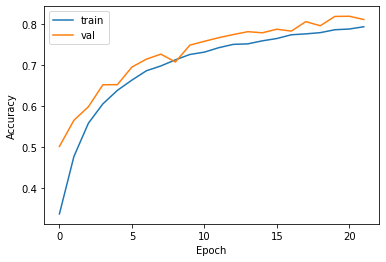

In [29]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [30]:
_, acc = model_cnn.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 80.90%


Make predictions for testing data

In [31]:
predict_x = model_cnn.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
y_pred[:9]

array([3, 8, 8, 8, 6, 6, 1, 6, 3], dtype=int64)

Visualize predictions

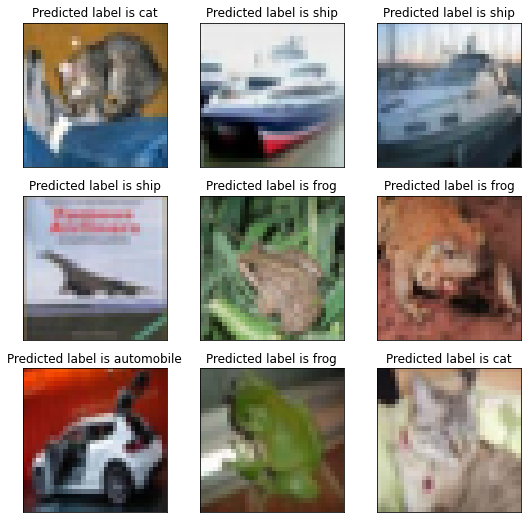

In [32]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()